## This is a code that implements Nick's Fourier Transform to get the Kernel Function for the Barrier:

In [281]:
from scipy.special import kv as kv # Import Bessel Function
from scipy.integrate import quad # Import function to do the integral
from scipy.special import erfc
from time import time

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [282]:
# Some Global Constants:
# Integration Boundary:
int_bount= 100

In [117]:
def integrand_ss(Y, y, x1, x2, b):
    '''y is the distance between y1 and y2; x1 and x2 are x coordinates. 
    b is strength of the barrier.'''
    c1 = b * np.cos(y*Y) / (2 + b * np.sqrt(1+Y**2)) 
    c2 = np.exp(-np.abs(x1+x2) * np.sqrt(1 + Y**2))
    return c1*c2

def integrand_ss1(Y, y, x1, x2, b):
    '''Integrand for samples on the same side; but includes Terms for 
    Bessel Decay'''
    c1 = b * np.cos(y*Y) / (2 + b * np.sqrt(1 + Y**2)) # The part for the reflection
    c2 = np.exp(-np.abs(x1+x2) * np.sqrt(1 + Y**2))
    
    c3 = np.cos(y*Y) / np.sqrt(1 + Y**2)  # These Terms will give Bessel Decay
    c4 = np.exp(-(np.abs(x1-x2)+0.000000) * np.sqrt(1+Y**2)) # To force decay: 0.0001
    return (c1*c2 + c3*c4)

def integrand_ds(Y, y, x1, x2, b):
    '''Integrand for sample on different sides of the Barrier'''
    c1 = 2 * np.cos(y*Y) / (np.sqrt(1 + Y**2) * (2 + b*np.sqrt(1 + Y**2)))
    c2 = np.exp(-np.abs(x1-x2) * np.sqrt(1+Y**2))     
    return c1*c2
    
def bessel0(y, x1, x2):
    '''Give the Bessel Part of the decay.'''
    r = np.sqrt((x1-x2)**2 + y**2) # Calculates pairwise Distance
    return kv(0, r)                # Gives the Bessel Decay

<IPython.core.display.Javascript object>


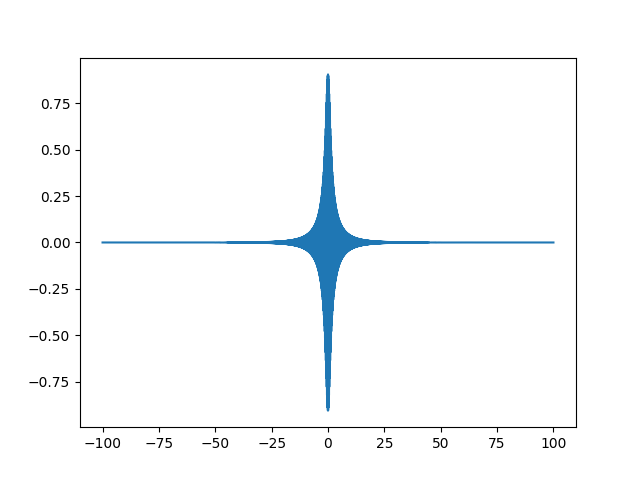

In [137]:
# Plot the Integrand:

plt.figure()
x = np.linspace(-100,100,100000)
x1 = np.linspace(1,1000,100000)
y = integrand_ss1(x, 50, 0.001, 0.1, 0.0)
plt.plot(x,y)
#plt.plot(x1,1/x1)
#plt.xscale('log')
plt.show()

In [118]:
def full_function(y, x1, x2, b):
    '''Gives the Fourier Transform of the Integrand.
    y is the distance between y1 and y2; x1 and x2 are x coordinates. 
    b is strength of the barrier.'''
    if x1==x2 and y==0:  # In case of identical samples
        return 1.0
    if (x1 <= 0 and x2 <= 0) or (x1 >= 0 and x2 >= 0):  # For same side of Barrier
        return (bessel0(y,x1,x2) + quad(integrand_ss, 
                                      0, np.inf, args=(y, x1, x2, b)))[0]
        

    else: # Different side of Barrier
        return quad(integrand_ds, 
            0, np.inf, args=(y, x1, x2, b))[0]  # 0 to only extract the exact part of the integral
    
def full_function_cut_off(y, x1, x2, b, bound=np.inf):
    '''Give the Fourier Transform of the Integrand;
    but with limited Boundaries for the Integral! Integrate also 
    the term giving bessel-decay'''
    if (x1 <= 0 and x2 <= 0) or (x1 >= 0 and x2 >= 0):  # For same side of Barrier
        return quad(integrand_ss1, 0, bound, args=(y, x1, x2, b))[0]       

    else: # Different side of Barrier
        return quad(integrand_ds, 
            0, bound, args=(y, x1, x2, b))[0]  # 0 to only extract the exact part of the integral

In [134]:
#%timeit full_function(0.1,1,2,0.5)
#print(full_function(0.1, 0.3, 0.4, 0.5))
#%timeit full_function(0.1, 0.3, 0.4, 0.5)
#print(full_function(0.00, -0.01, 0.02, 0.03))
#print(full_function_cut_off(0.00, -0.01, 0.02, 0.03, bound=np.inf))

print(full_function_cut_off(50, 0.011, 0.012, 0.0,bound=100))
print(full_function(50, 0.011, 0.012, 0.0))
print(bessel0(50, 0.011, 0.012))

#%timeit full_function_cut_off(0.1, -0.011, 0.011, 0.1)
#%timeit full_function(0.1, -0.011, 0.011, 0.1)

-0.00340111629715
3.41016771535e-23
3.41016771535e-23


<IPython.core.display.Javascript object>


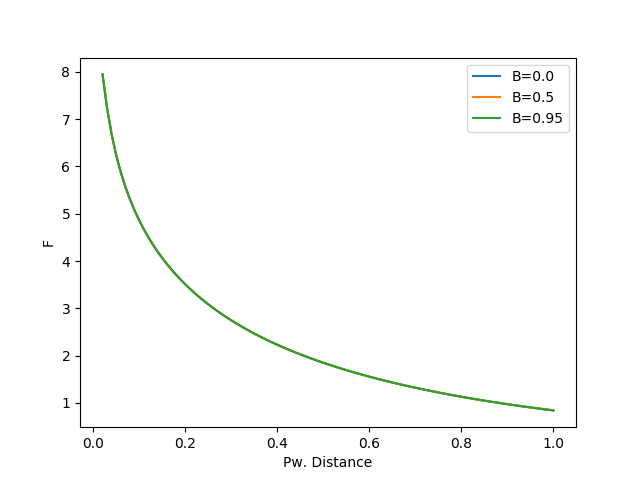

In [40]:
# Okay, now start the plotting action:
x_vec=np.linspace(0.02,1,100)
y = np.array([full_function(0.01, 0.01, x, b=0.0) for x in x_vec])
y1 = np.array([full_function(0.01, 0.01, x, b=0.5) for x in x_vec])
y2 = np.array([full_function(0.01, 0.01, x, b=0.95) for x in x_vec])

yb = np.array([full_function(0.01, -0.01, x, b=0.0) for x in x_vec])
yb1 = np.array([full_function(0.01, -0.01, x, b=0.5) for x in x_vec])
yb2 = np.array([full_function(0.01, -0.01, x, b=0.95) for x in x_vec])

# Do the Plotting
plt.figure()
plt.plot(x_vec, y + yb, label="B=0.0")
plt.plot(x_vec, y1 + yb1, label="B=0.5")
plt.plot(x_vec, y2 + yb2, label="B=0.95")


#plt.plot(x_vec,yb,label="B=0.0")
#plt.plot(x_vec,yb1,label="B=0.5")
#plt.plot(x_vec,yb2,label="B=0.95")

#plt.yscale('log')
plt.xlabel("Pw. Distance")
plt.ylabel("F")
#plt.xscale('log')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


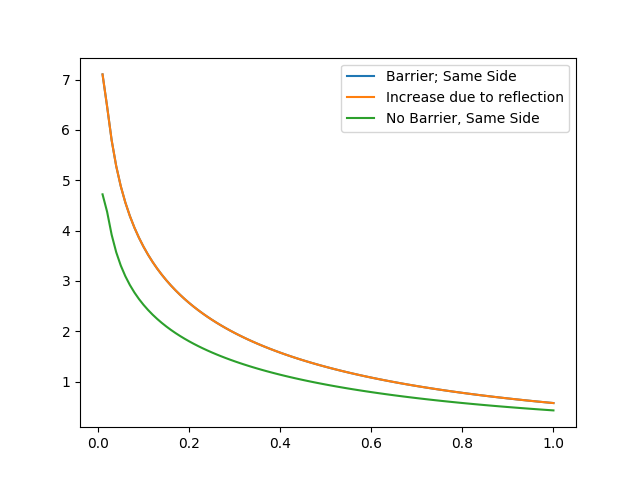

In [10]:
# Some more Sanity Checks:
x_vec=np.linspace(0.01,1,100)

y_no = np.array([full_function(0.01, 0.01, x, b=0) for x in x_vec])     # Samples K0
y_no_r = np.array([full_function(0.01, -0.01, x, b=0) for x in x_vec])   # Reflected Samples K0


y1 = np.array([full_function(0.01, -0.01, x, b=0.8) for x in x_vec])    # 
y2 = np.array([full_function(0.01, 0.01, x, b=0.8) for x in x_vec])     #

plt.figure()
plt.plot(x_vec,y2,label="Barrier; Same Side")
plt.plot(x_vec, y_no + (y_no_r-y1), label="Increase due to reflection")  # Sample plus increase due to what is missing for
plt.plot(x_vec, y_no, label="No Barrier, Same Side")                     #  
plt.legend()
#plt.plot(x_vec, 5*np.exp(-(3*x_vec)))
plt.show()

<IPython.core.display.Javascript object>


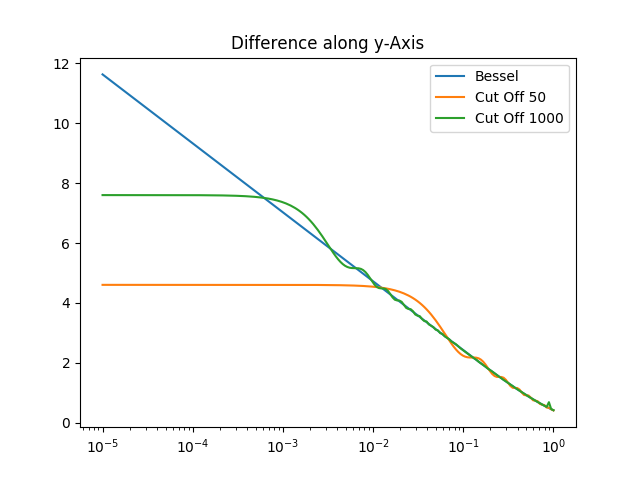

<IPython.core.display.Javascript object>


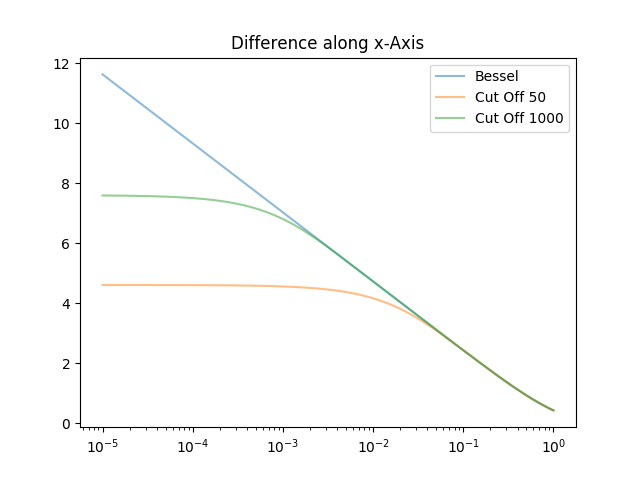

In [206]:
# Make a Plot to check behavior with increasing y:
#y_vec = np.linspace(0.001,1,200)
y_vec = np.logspace(-5, 0, 200)

y0 = bessel0(y_vec, 0.011, 0.011)
y1 = np.array([full_function_cut_off(yd, 0.011, 0.011, b=0, bound = 50) for yd in y_vec])
y2 = np.array([full_function_cut_off(yd, 0.011, 0.011, b=0, bound = 1000) for yd in y_vec])

plt.figure()
plt.plot(y_vec, y0, label="Bessel")
plt.plot(y_vec, y1, label="Cut Off 50")
plt.plot(y_vec, y2, label="Cut Off 1000")
plt.legend()
plt.xscale("log")
plt.title("Difference along y-Axis")
plt.show()

# And now make Plot for the same thing along x-axis
x_vec = np.logspace(-5, 0, 200)

y0 = bessel0(0.0, 0, x_vec)
y1 = np.array([full_function_cut_off(0.0, 0, x2, b=0, bound = 50) for x2 in x_vec])
y2 = np.array([full_function_cut_off(0.0, 0, x2, b=0, bound = 1000) for x2 in x_vec])

plt.figure()
plt.plot(y_vec, y0, label="Bessel",alpha=0.5)
plt.plot(y_vec, y1, label="Cut Off 50",alpha=0.5)
plt.plot(y_vec, y2, label="Cut Off 1000",alpha=0.5)
plt.legend()
plt.xscale("log")
plt.title("Difference along x-Axis")
plt.show()

<IPython.core.display.Javascript object>


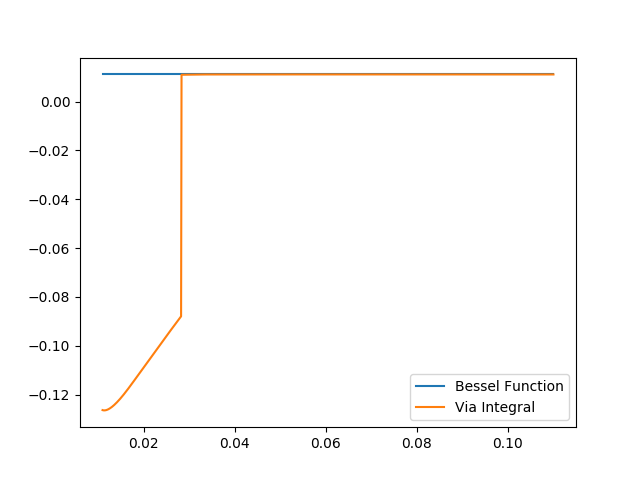

In [104]:
# Code to check whether Integral on different side of the barrier agrees with k0
x_vec = np.linspace(0.011,0.11,1000)
y0 = bessel0(4, 0.011, x_vec) # Only Bessel Function
y1 = np.array([full_function_cut_off(4, 0.011, x, b=0, bound=1000) for x in x_vec])
plt.figure()
plt.plot(x_vec, y0, label="Bessel Function")  # Via the Bessel-function
plt.plot(x_vec, y1, label="Via Integral")  # Via the Integral with b=0
plt.legend()
plt.show()           # Yay they are ident!!!

In [134]:
# Some trial Cells:
def f(x,a):
    return 1.0/x**a

In [135]:
quad(f, 2, np.inf, args=(3))

(0.12499999999999997, 5.841441494062356e-10)

[[-0.38 -0.5 ]
 [-0.38 -0.46]
 [-0.38 -0.42]
 [-0.38 -0.38]
 [-0.38 -0.34]
 [-0.38 -0.3 ]
 [-0.38 -0.26]
 [-0.38 -0.22]
 [-0.38 -0.18]
 [-0.38 -0.14]]


<IPython.core.display.Javascript object>


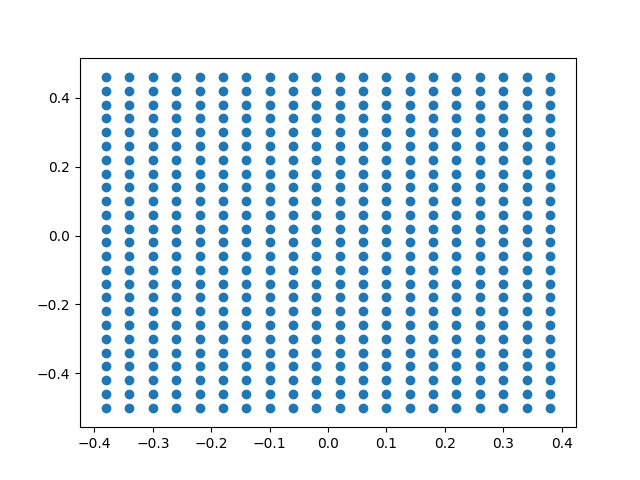

In [212]:
scale_factor = 50.0
X_data = np.loadtxt('./coordinates15.csv', delimiter='$').astype('float64') / scale_factor # Load the complete X-Data
print(X_data[:10])
plt.figure()
plt.scatter(X_data[:500,0],X_data[:500,1])
plt.show()

In [217]:
def calc_kernel_mat(coords, b, bound):
    # Produce Full Covariance Matrix
    kernel=np.array([[full_function_cut_off(i[1]-j[1], i[0], j[0], b, bound=bound) for i in coords] for j in coords])
    return kernel

print(np.shape(X_data))
kernel=calc_kernel_mat(X_data[:500,:], 0.5, 50)

(500, 2)


In [103]:
print(X_data[0,:])
print(X_data[2,:])
print(full_function_cut_off(4, 0, 0, 0))
print(full_function(4, 0, 0, 0))
print(bessel0(4, 0, 0))

[-19. -25.]
[-19. -21.]
-2.71324211786
0.0111596760859
0.0111596760859


In [36]:
#np.linalg.eigvals(kernel)
for i in range(np.size(kernel,0)):
    kernel[i,i]=0.3
np.max(kernel)

0.29999999999999999

In [215]:
kernel[:5,:5]

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [257]:
a=np.linalg.eigvals(kernel+0.0001*np.eye(len(kernel[:,0])))
a

array([  5.78462602e+02,   2.41415956e+02,   1.68567222e+02,
         1.09121023e+02,   7.01880127e+01,   5.55561895e+01,
         5.03512857e+01,   4.14393779e+01,   3.80326769e+01,
         3.56788473e+01,   3.28135621e+01,   3.11126539e+01,
         2.64492028e+01,   2.37394700e+01,   2.23771984e+01,
         2.04829187e+01,   1.90441431e+01,   1.75989122e+01,
         1.53200239e+01,   1.50966189e+01,   1.43613542e+01,
         1.42049954e+01,   1.40819294e+01,   1.35873494e+01,
         1.32832035e+01,   1.28448115e+01,   1.17262835e+01,
         1.11795613e+01,   1.08622633e+01,   1.07425152e+01,
         1.03984721e+01,   1.02777483e+01,   9.92156217e+00,
         9.53663939e+00,   8.47607187e+00,   8.30436585e+00,
         8.22832448e+00,   8.19197260e+00,   8.03852236e+00,
         7.96583289e+00,   7.37392693e+00,   7.16758300e+00,
         7.09198635e+00,   6.94947004e+00,   6.90138880e+00,
         6.77029430e+00,   6.72696018e+00,   6.55376420e+00,
         6.49423507e+00,

In [16]:
np.max(kernel)

1.0

In [33]:
# Bessel Kernel
# Quickly calculate a Bessel Kernel:
def calc_kernel_mat(coords):
    # Produce Full Covariance Matrix
    kernel=np.array([[bessel0(i[1]-j[1], i[0], j[0]) for i in coords] for j in coords])
    return kernel

X_data = np.loadtxt('./coordinates15.csv', delimiter='$').astype('float64') # Load the complete X-Data

print(np.size(X_data,0))

kernel=calc_kernel_mat(X_data)

500


## And now play around with numerical Integration and compare to Bessel Function!

In [222]:
def integrand_nobarrier(t, r, sigma, mu):
    '''The integrand in case there is no barrier'''
    diff=1/t * np.exp(-(r**2)/(sigma**2 * t)) # Diffusion
    ld_migration=np.exp(-t*2*mu)      # Long Distance Migration
    return diff * ld_migration
    

def num_integral(initial_sep, t0, sigma, mu):
    '''Function that calculates numerically what the identity 
    due to shared ancestry should be.'''    
    return quad(integrand_nobarrier, 
        t0, np.inf, args=(initial_sep, sigma, mu))[0]  # 0 to only extract the exact part of the integral

In [225]:
%timeit num_integral(20, t0=1, sigma=1, mu=0.5)

1000 loops, best of 3: 192 µs per loop


Now do some Plotting action:
Compare numerical Integrals to Bessel Function:

<IPython.core.display.Javascript object>


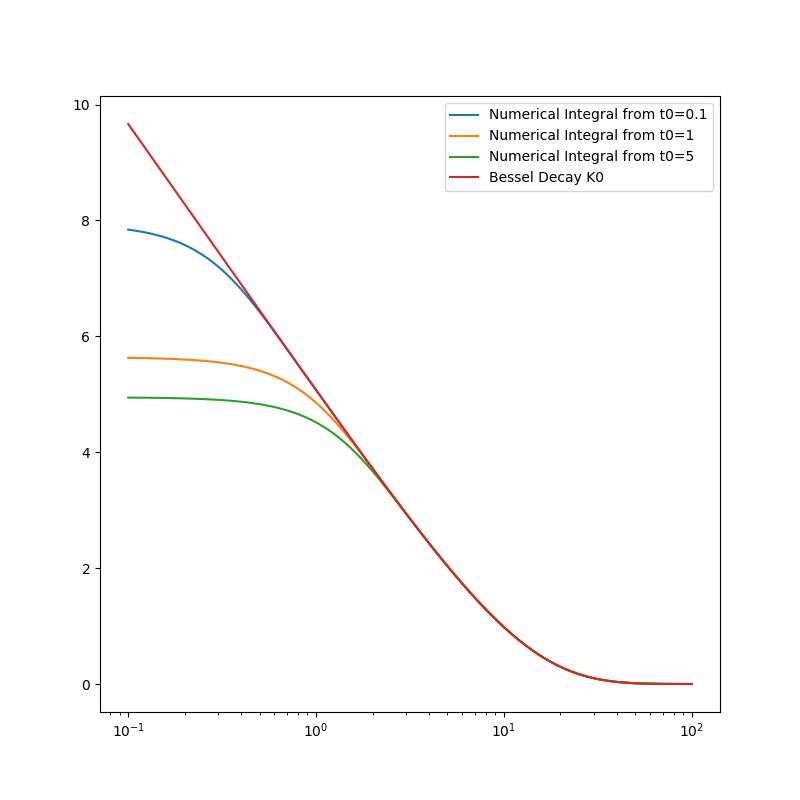

In [280]:
sigma = 1
mu = 0.001

x_vec=np.logspace(-1,2,100)
y_vec01=np.array([num_integral(x,t0=0.1,sigma=sigma,mu=mu) for x in x_vec])
y_vec1=np.array([num_integral(x, t0=1, sigma=sigma, mu=mu) for x in x_vec])
y_vec20=np.array([num_integral(x, t0=2, sigma=sigma, mu=mu) for x in x_vec])

y_bessel=2*kv(0,2*np.sqrt(2*mu)*x_vec)   # The numerical Result from Mathematica


plt.figure(figsize=(8,8))
plt.plot(x_vec, y_vec01,label="Numerical Integral from t0=0.1")
plt.plot(x_vec, y_vec1, label="Numerical Integral from t0=1")
plt.plot(x_vec, y_vec20, label="Numerical Integral from t0=5")
plt.plot(x_vec, y_bessel, label="Bessel Decay K0")
plt.xscale("log")
plt.legend()
plt.show()

One can clearly see that there are different regimes:
-  The constant regime (determined by t0)
-  The logarithmic regime (determined by whats in the Bessel)
- The exponential regime 

Now lets see if that's positive definite (it kind of should be the way it is constructed...)

<IPython.core.display.Javascript object>


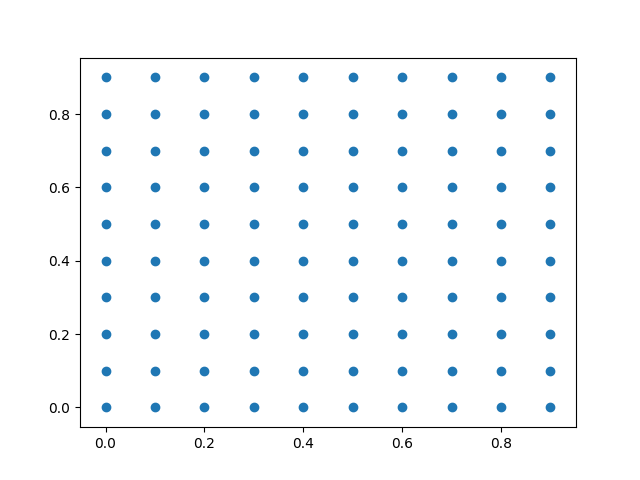

In [268]:
coords = np.array([[0.1*i, 0.1*j] for i in xrange(10) for j in xrange(10)])

dist_mat = np.sqrt(np.sum((coords[:, None] - coords[None, :])** 2,axis=2))


plt.figure()
plt.scatter(coords[:,0], coords[:,1])
plt.show()

In [277]:
num_integral_v=np.vectorize(num_integral)  # Vectorizes the integral
kernel1 = num_integral_v(dist_mat, t0=0.1, sigma=sigma, mu=mu) # Calculate the kernel via vectorized function

In [278]:
a=np.linalg.eigvals(kernel1+0.000001*np.eye(len(kernel1[:,0])))
a

array([  6.44846918e+02 +0.00000000e+00j,
         4.85982075e+01 +0.00000000e+00j,
         4.85982075e+01 +0.00000000e+00j,
         1.43939812e+01 +0.00000000e+00j,
         1.14409655e+01 +0.00000000e+00j,
         8.72562796e+00 +0.00000000e+00j,
         3.99072984e+00 +0.00000000e+00j,
         3.99072984e+00 +0.00000000e+00j,
         1.29450999e+00 +0.00000000e+00j,
         9.97254457e-01 +0.00000000e+00j,
         1.98899074e+00 +0.00000000e+00j,
         1.98899074e+00 +0.00000000e+00j,
         8.58740361e-01 +0.00000000e+00j,
         3.96529792e-01 +0.00000000e+00j,
         1.83519825e-01 +0.00000000e+00j,
         3.57338267e-01 +0.00000000e+00j,
         3.32473098e-01 +0.00000000e+00j,
         3.32473098e-01 +0.00000000e+00j,
         1.83519825e-01 +0.00000000e+00j,
         9.12706597e-02 +0.00000000e+00j,
         7.54690331e-02 +0.00000000e+00j,
         5.90155709e-02 +1.56419401e-15j,
         5.90155709e-02 -1.56419401e-15j,
         6.44923322e-02 +0.0000000

## Result: 
So this new Kernel is positive definte! 
uhhh YAAAAAAY

So now go to the hard part and make it for the whole barrier - lets see what this brings!

In worst case one could fall back to that!

In [ ]:
# Work in Progress!!

def integrand_barrier_ss(t, dy, x0, x1, sigma, mu):
    '''The integrand in case there is no barrier
    dy is the difference along y axis'''
    D=sigma**2
    gaussiany = 1/np.sqrt(4*np.pi*D*t) * np.exp(- dy**2 /(4*D*t))    # Gives the Gaussian along the y-Axis
    
    diff_x1 =
    diff_x2 = 
    
    return diff * ld_migration

def integrand_barrier_ds(t, r, sigma, mu)
    D=sigma**2
    gaussiany = 1/np.sqrt(4*np.pi*D*t) * np.exp(- dy**2 /(4*D*t))    # Gives the Gaussian along the y-Axis
    
    diff_x1 =
    diff_x2 =
    
    return
    

def num_integral_barrier(initial_sep, t0, sigma, mu, b):
    '''Function that calculates numerically what the identity 
    due to shared ancestry should be.'''    
    return quad(integrand_nobarrier, 
        t0, np.inf, args=(initial_sep, sigma, mu))[0]  # 0 to only extract the exact part of the integral

In [321]:
# Error function:
def GS(x,y,t,k,D):
    '''For the same side'''
    n1 = np.exp(-(x-y)**2/(4*D*t)) + np.exp(-(x+y)**2/(4*D*t))
    d1 = np.sqrt(4*np.pi*D*t)
    
    a2 = k/D * np.exp(2*k/D * (y+x+2*k*t))
    b2 = erfc((y+x+4*k*t)/(2*np.sqrt(D*t)))
    return (n1/d1 - a2*b2)

def GD(x,y,t,k,D):
    '''For different sides'''
    a1=k/D*np.exp(2*k/D * (y-x+2*k*t))
    b1=erfc((y-x+4*k*t)/(2*np.sqrt(D*t)))
    return a1*b1

def gaussian(x,y,t,k,D):
    '''The normal thing without a barrier'''
    return np.exp(-(x-y)**2/(4*D*t)) / np.sqrt(4*np.pi*D*t)

<IPython.core.display.Javascript object>


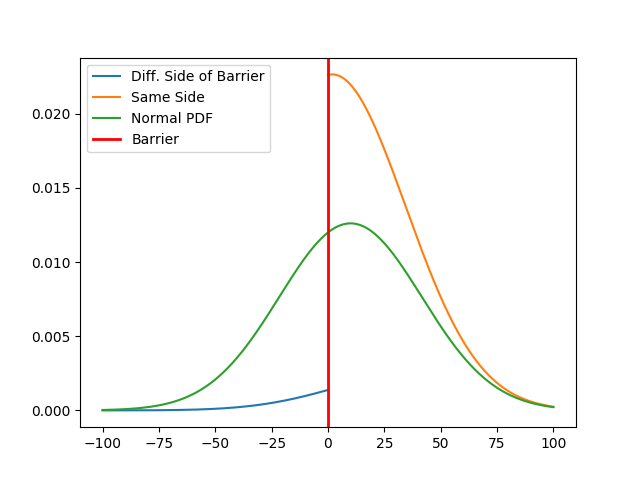

In [360]:
k=0.01
D=5.0

x_vec=np.linspace(0,100,1000)
x_vec_refl=np.linspace(-100,0,1000)
x_vec_gaussian=np.linspace(-100,100,1000)

y=np.array([GS(x, 10, 100.0, k, D) for x in x_vec])
y_refl=np.array([GD(x, 10, 100.0, k, D) for x in x_vec_refl])
y_gaussian=np.array([gaussian(x, 10, 100.0, k, D) for x in x_vec_gaussian])


plt.figure()
plt.plot(x_vec_refl, y_refl, label="Diff. Side of Barrier")
plt.plot(x_vec, y, label="Same Side")
plt.plot(x_vec_gaussian, y_gaussian, label="Normal PDF")
plt.axvline(x=0.0,c="red", linewidth=2, label="Barrier")

plt.legend()
plt.show()